In [1]:
## Importar las librerías necesarias para hacer el análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from random import random
import matplotlib.ticker as plticker
from pmdarima import auto_arima

In [3]:
## Se tiene una base de datos que contiene información sobre la cantidad y el tipo de homicidio cometido desde el año 1997
## hasta el 2017 de todo el país de México, dividido por Entidad Federativa

## Para este caso sólo interesa analizar los homicidios cometidos en el estado de Veracruz en el periodo 2008-2017
## Se llevó a cabo la limpieza correspondiente, eliminando todas las observaciones que no pertenecieran a Veracruz y al periodo
## de interés


d = pd.read_excel('Delitos.xlsx')
d.head()

,Año,Inegi,Entidad,Modalidad,Tipo,Subtipo,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,17,17,17,17,17,17,32,0,38,28,22,31
1,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DAÑO EN PROPIEDAD AJENA,DAÑO EN PROPIEDAD AJENA,45,45,45,45,45,45,108,40,117,38,73,133
2,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,EXTORSION,EXTORSION,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,FRAUDE,FRAUDE,9,9,9,9,9,9,52,0,55,51,42,44
4,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
## Seleccionar sólo las observaciones referentes al Estado de Veracruz
datos = d.query('Entidad == "VERACRUZ"')
#datos.head()
## Exportar
#datos.to_excel('Veracruz_Delitos.xlsx', index = False)
## Seleccionar sólo los homicidios
hom = pd.read_excel('Veracruz_Delitos.xlsx')
dhom = hom.query('Modalidad == "HOMICIDIOS"')
#dhom.head()
## Exportar
#dhom.to_excel('Homicidios_Veracruz.xlsx', index = False)

## Análisis Descriptivo

In [40]:
datos = pd.read_excel('Homicidios_Veracruz.xlsx', sheet_name = 'Datos')
datos.head()
## Seleccionar sólo los registros del 2008 al 2017
d2 = datos.query('Año > 2007')
d2
## Crear una DataFrame con la cantidad de Homicidios cometidos por mes en el periodo 2008-2017
data1 = pd.DataFrame({
    'Mes':[
        'Enero',
        'Febrero',
        'Marzo',
        'Abril',
        'Mayo',
        'Junio',
        'Julio',
        'Agosto',
        'Septiembre',
        'Octubre',
        'Noviembre',
        'Diciembre'
    ],
    'Homicidios': [
        d2['Enero'].sum(),
        d2['Febrero'].sum(),
        d2['Marzo'].sum(),
        d2['Abril'].sum(),
        d2['Mayo'].sum(),
        d2['Junio'].sum(),
        d2['Julio'].sum(),
        d2['Agosto'].sum(),
        d2['Septiembre'].sum(),
        d2['Octubre'].sum(),
        d2['Noviembre'].sum(),
        d2['Diciembre'].sum(),
    ]
}, columns = ['Mes', 'Homicidios'])
        
data1

,Mes,Homicidios
0,Enero,1172
1,Febrero,1167
2,Marzo,1280
3,Abril,1347
4,Mayo,1370
5,Junio,1418
6,Julio,1384
7,Agosto,1440
8,Septiembre,1345
9,Octubre,1483


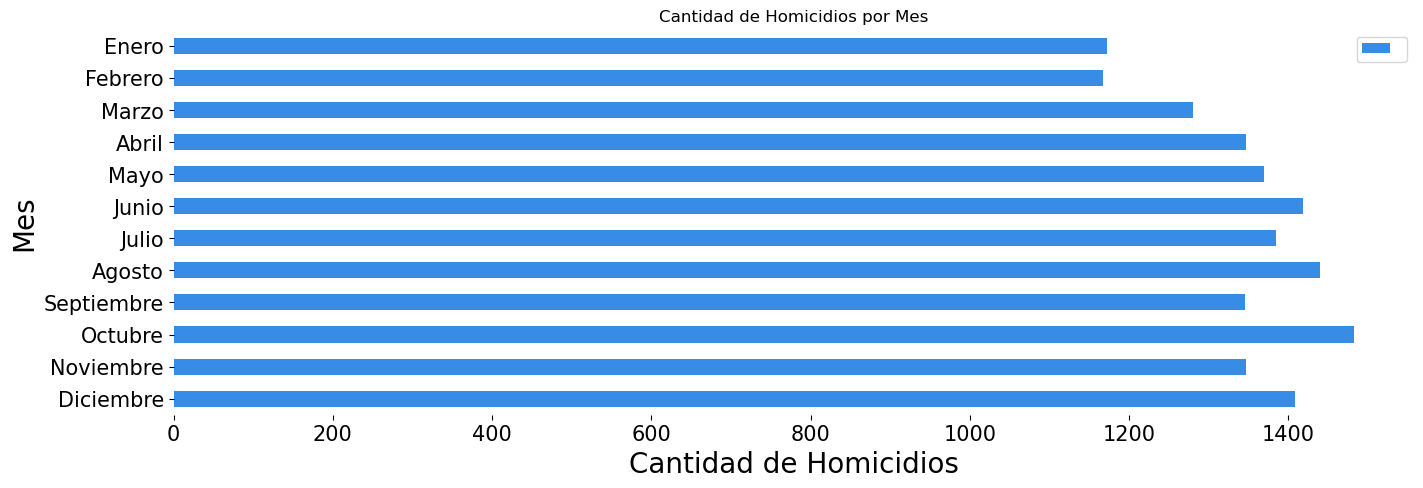

In [41]:
## Cambiar el orden de la data
data2 = data1.iloc[::-1]
## Graficar los meses que presentaron mayor cantidad de homicidios
data2.plot(kind = 'barh', x = 'Mes', y = 'Homicidios', color = '#378CE7', width = 0.5, label = '')
plt.xlabel('Cantidad de Homicidios')
plt.ylabel('Mes')
plt.title('Cantidad de Homicidios por Mes')
plt.show()

## Análisis de Serie de Tiempo

In [9]:
datos = pd.read_excel('Homicidios_Veracruz.xlsx',sheet_name = 'Registros')
datos.head()

## Convertir a formato de fecha la variable "Fecha"
datos['Fecha'] = pd.to_datetime(datos['Fecha'])

fecha = datos['Fecha']
cantidad = datos['Cantidad']
datos.head()

,Fecha,Cantidad
0,2008-01-01,128
1,2008-02-01,129
2,2008-03-01,144
3,2008-04-01,140
4,2008-05-01,143


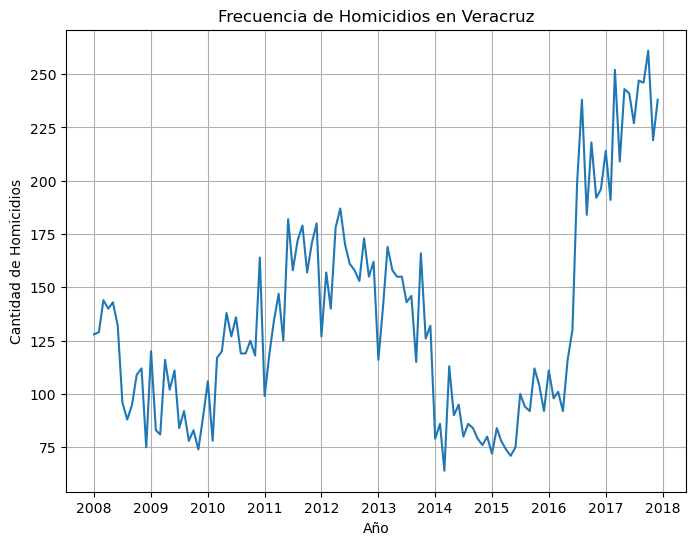

In [10]:
## Visualización de la Serie de Tiempo
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(fecha, cantidad)
plt.title('Frecuencia de Homicidios en Veracruz')
plt.xlabel('Año')
plt.ylabel('Cantidad de Homicidios')
plt.grid(True)
plt.show()

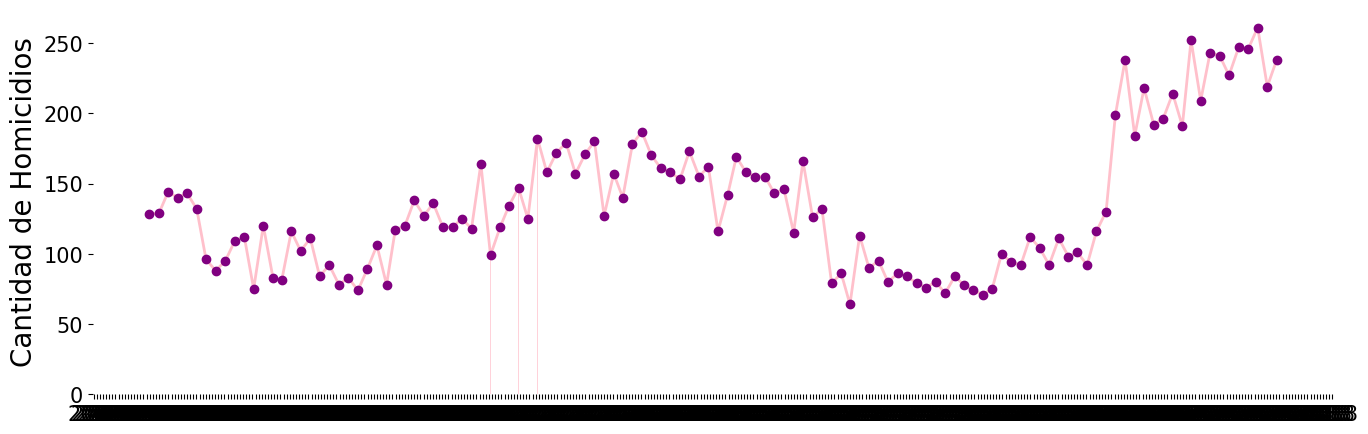

In [11]:
## Se puede ver como desde el 2016 los homicidios aumentaron en el Estado de Veracruz

# Personalización de parámetros para los gráficos 
plt.rcParams["figure.figsize"] = [16, 5]
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["lines.markerfacecolor"] = "purple"
plt.rcParams["lines.markeredgecolor"] = "purple"
plt.rcParams["lines.markersize"] = 6
plt.rcParams["patch.facecolor"] = "purple"
plt.rcParams["patch.edgecolor"] = "purple"

datos2 = datos[["Fecha", "Cantidad"]].set_index(["Fecha"])

# Serie de tiempo
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=10))
ax.plot(datos2.index, datos2["Cantidad"], 
        color="pink", marker="o", linestyle="-")
ax.bar(datos2.index, datos2["Cantidad"], 
       width=0.1, color="pink", alpha=0.7)
ax.set_ylabel("Cantidad de Homicidios")
plt.show()

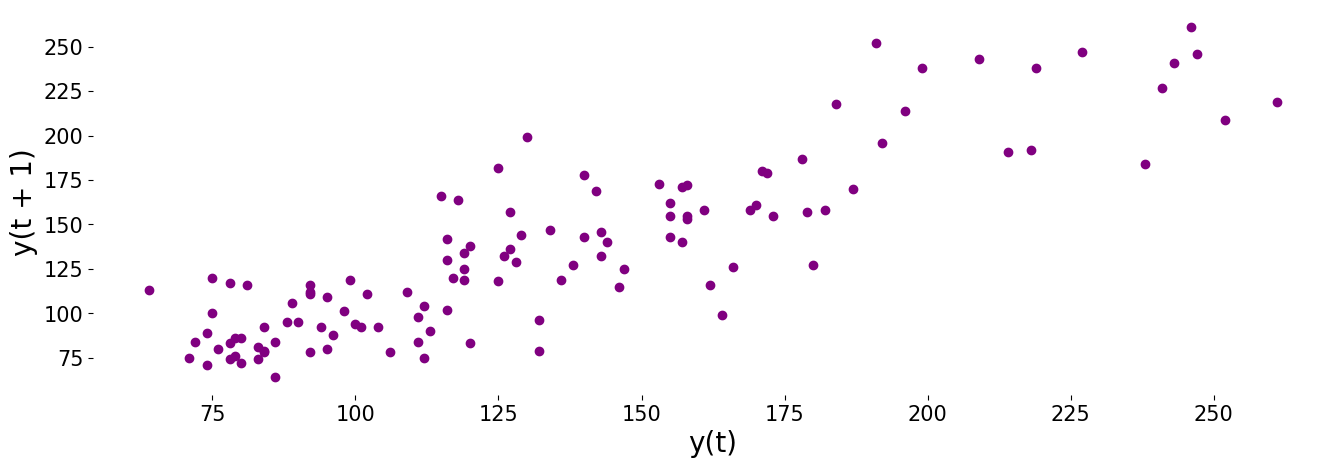

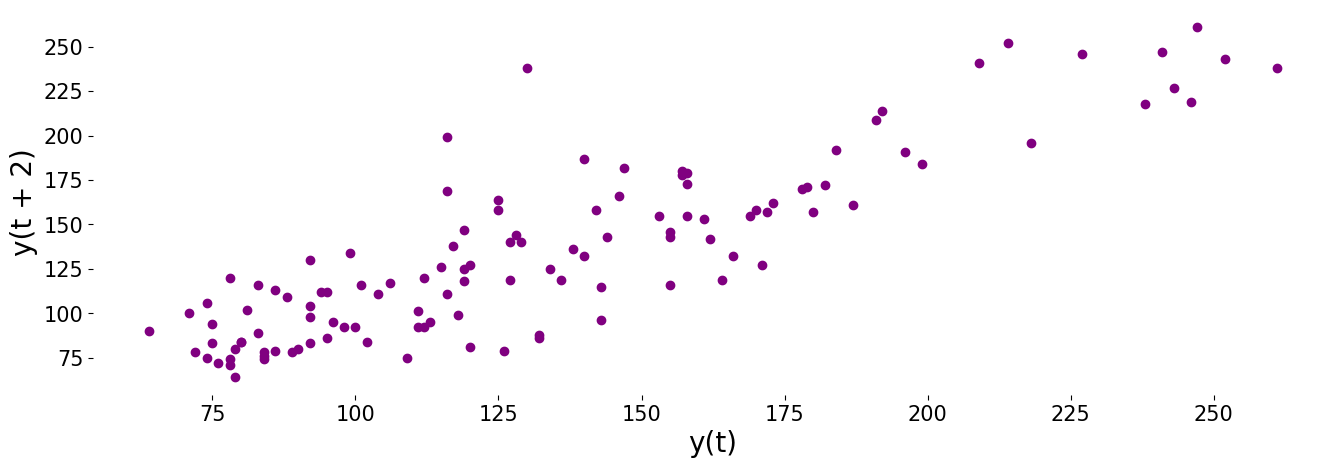

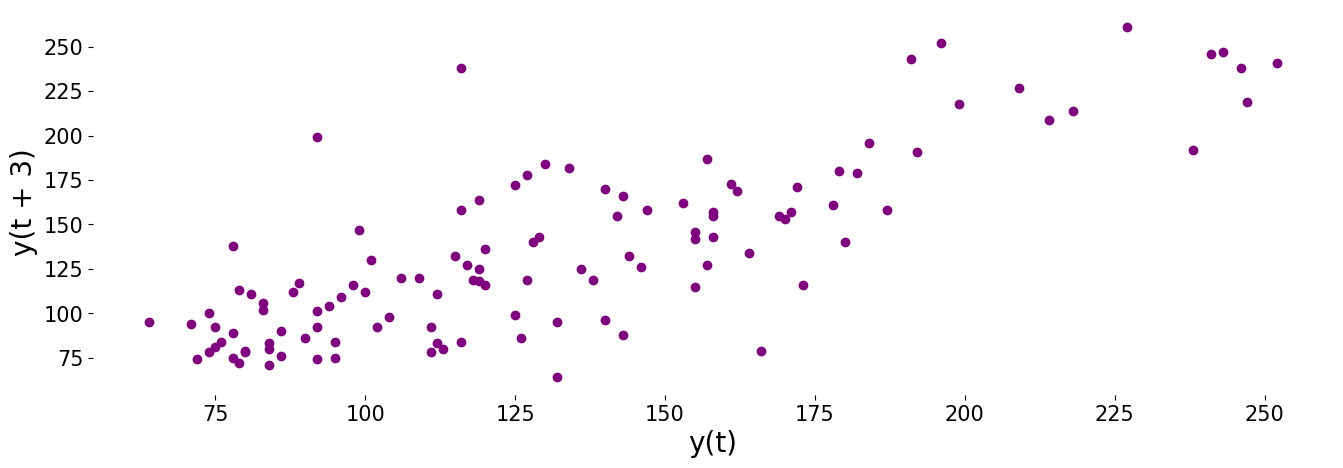

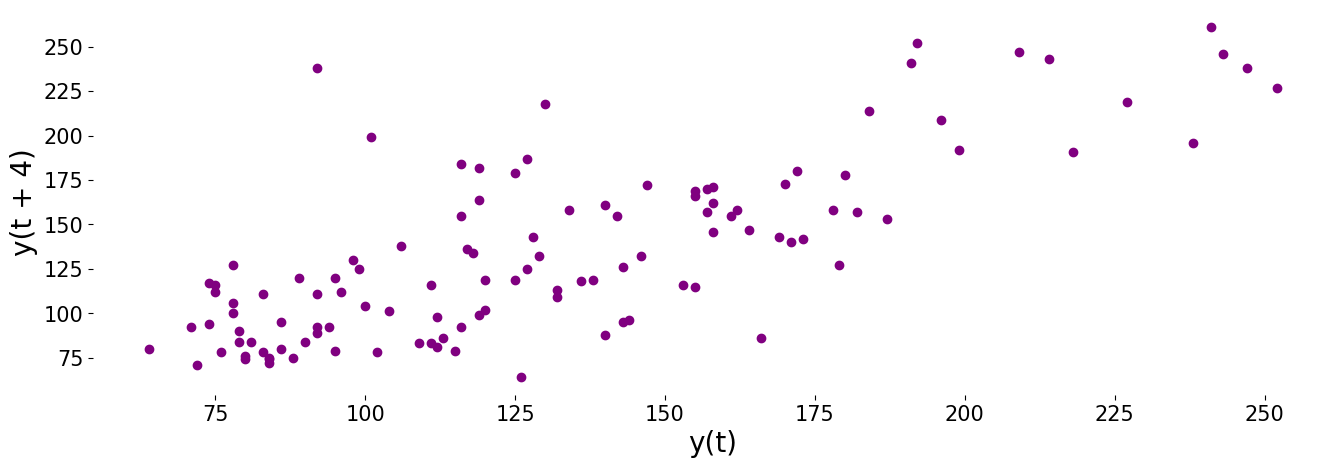

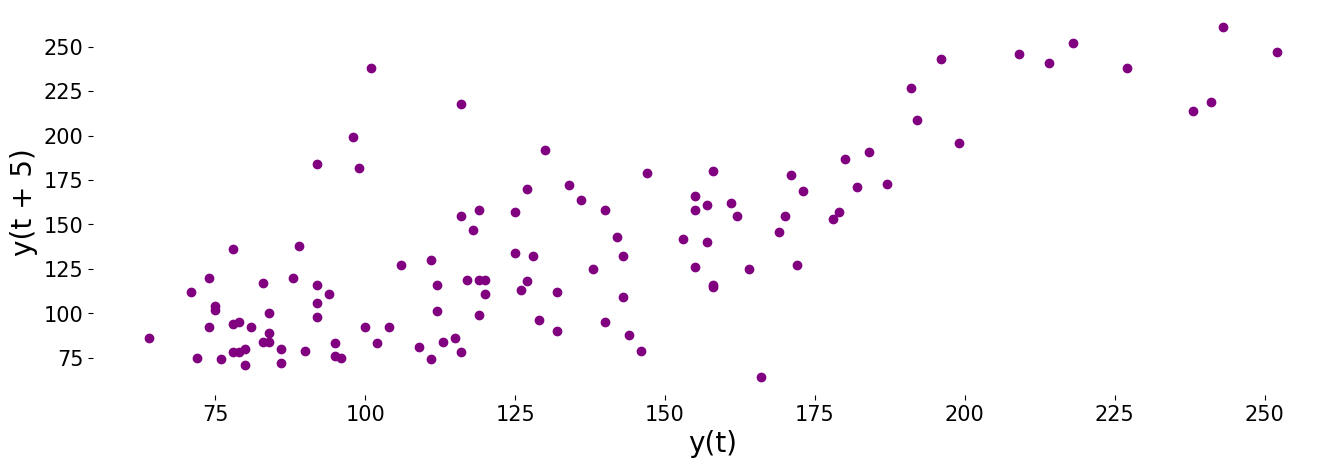

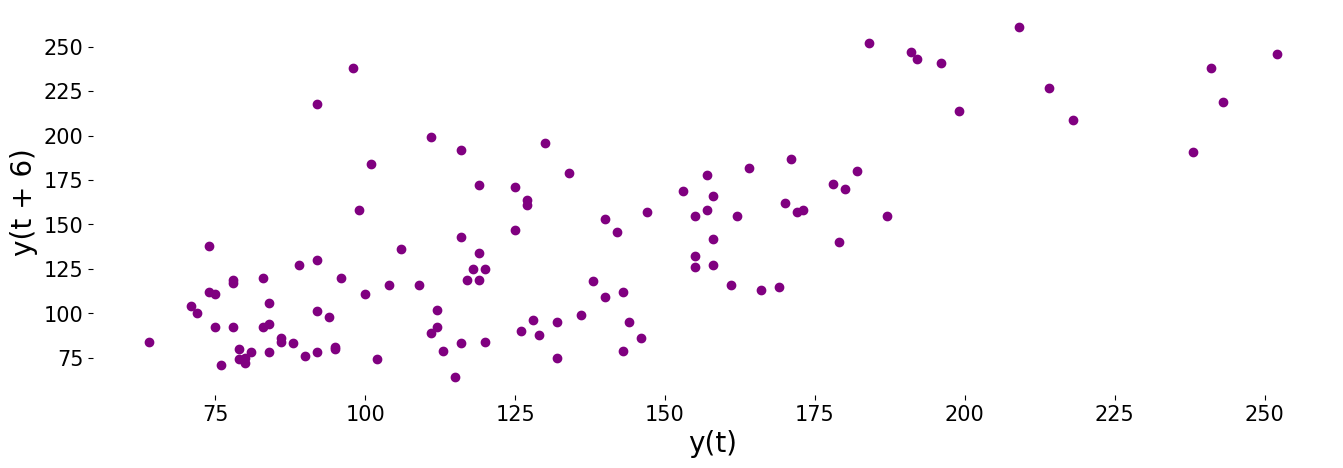

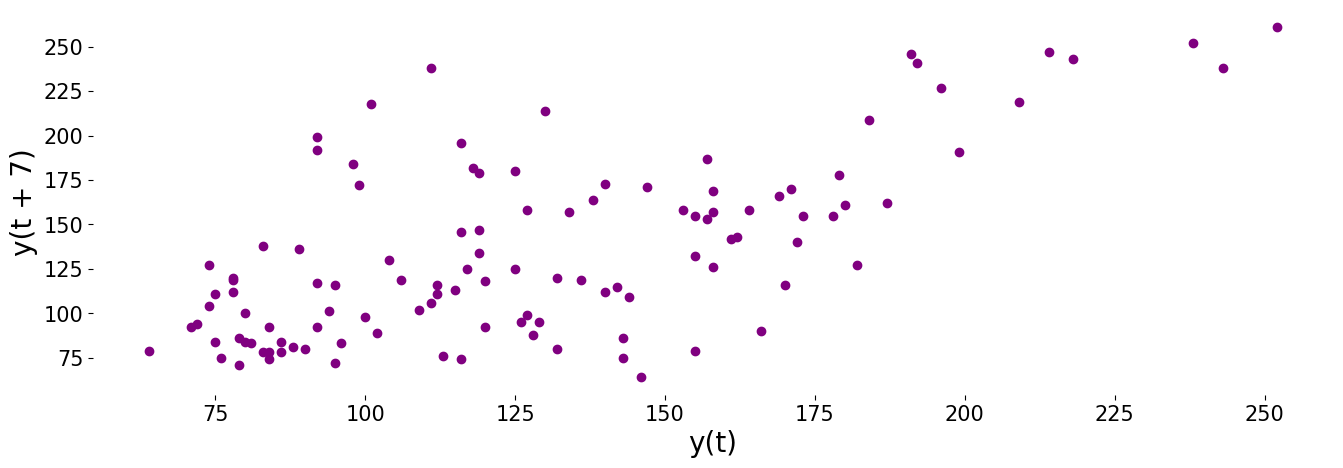

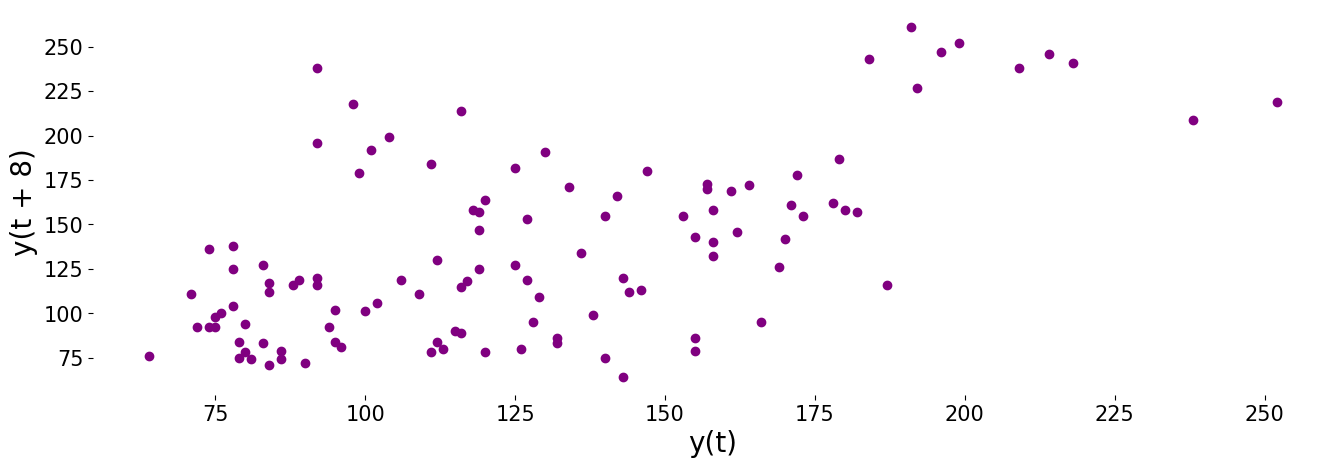

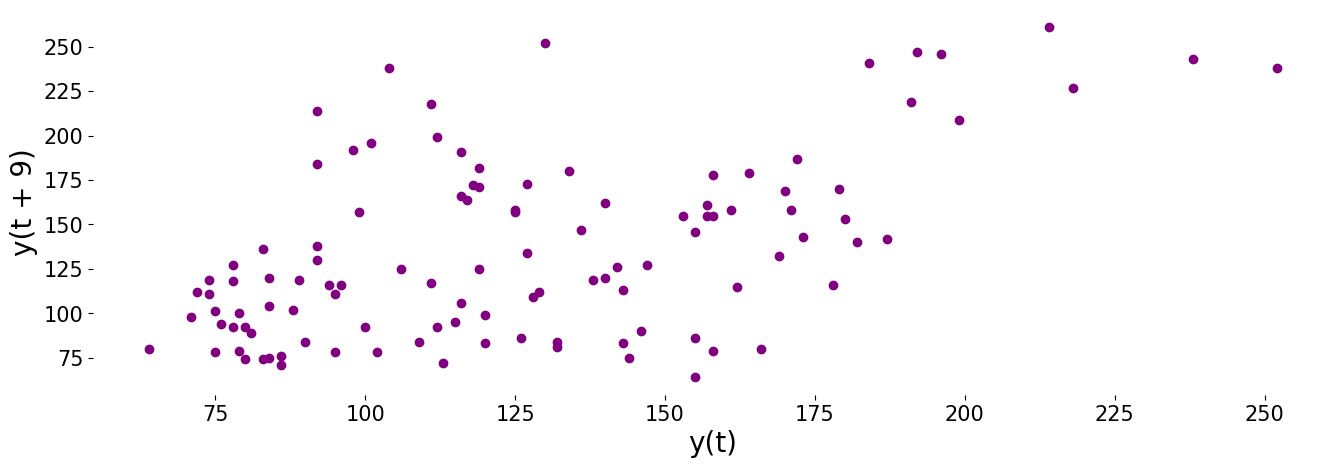

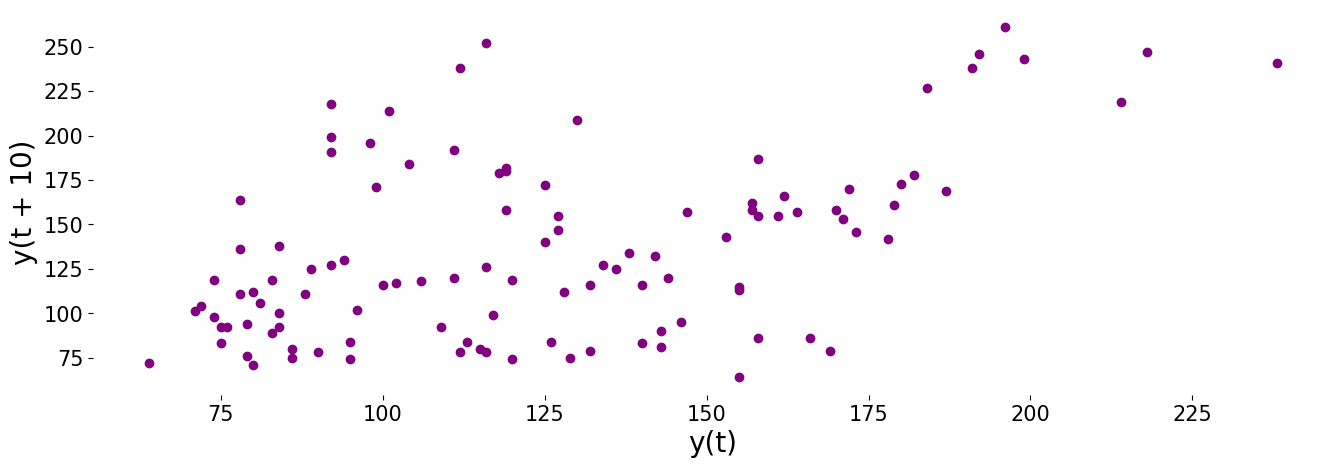

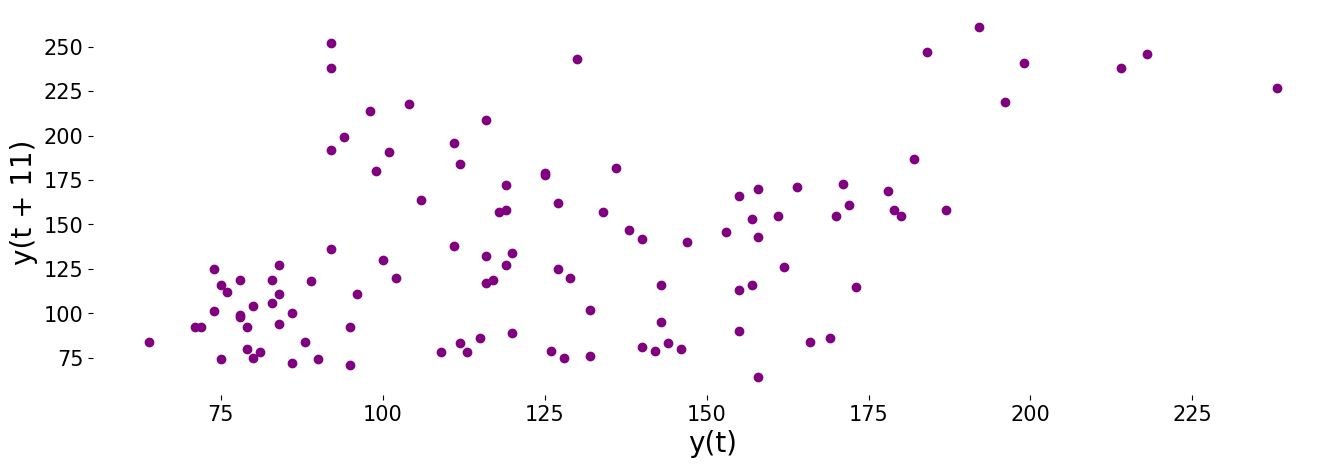

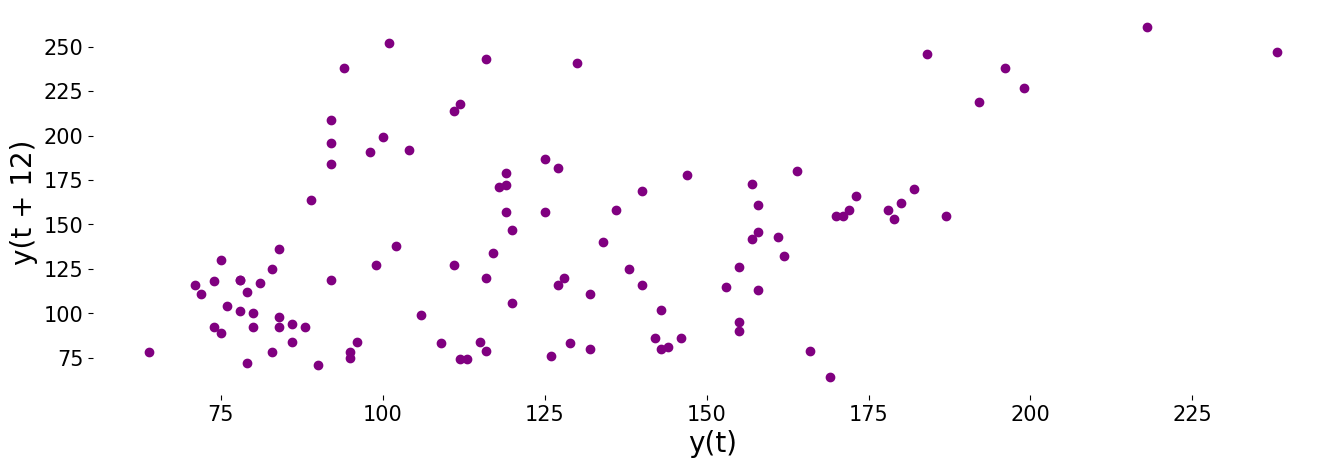

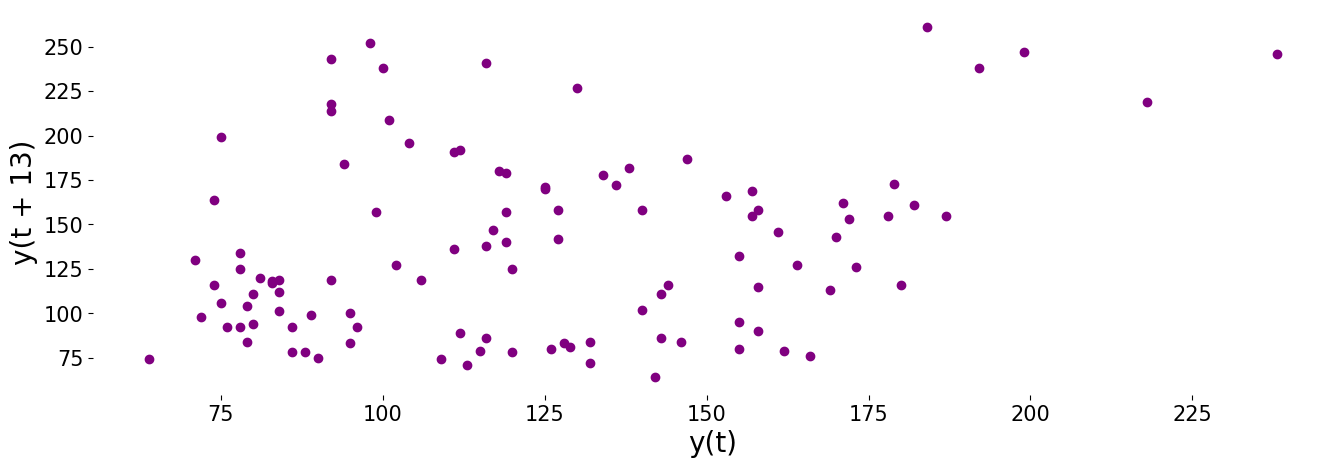

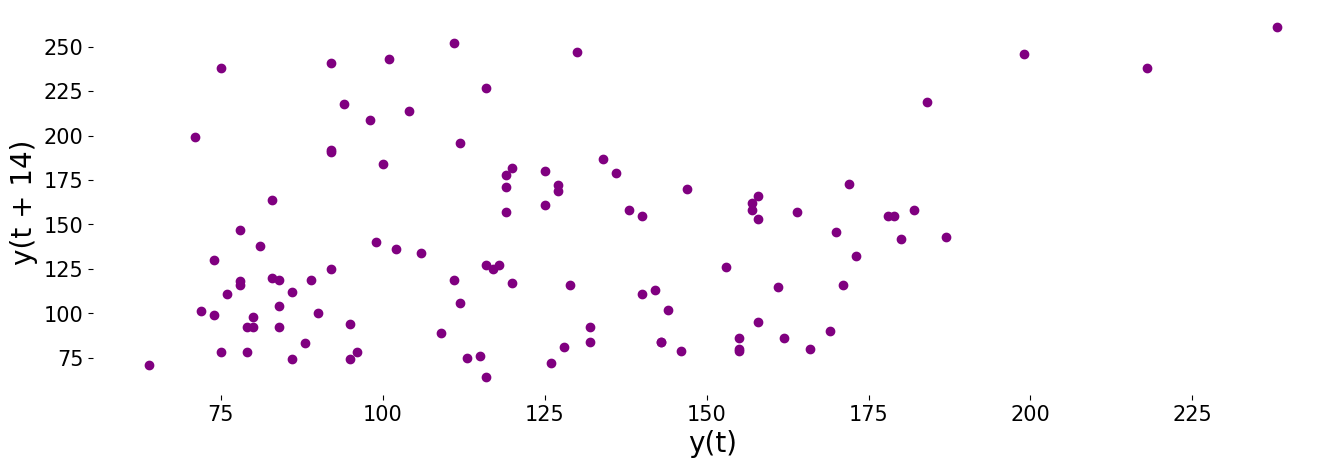

In [12]:
## Gráficos de retardo
for retraso in range(1, 15):
    pd.plotting.lag_plot(datos2["Cantidad"], lag = retraso)
    plt.show()
    
## Gráficos de retardo, desde 1 retardo hasta 14 retardos

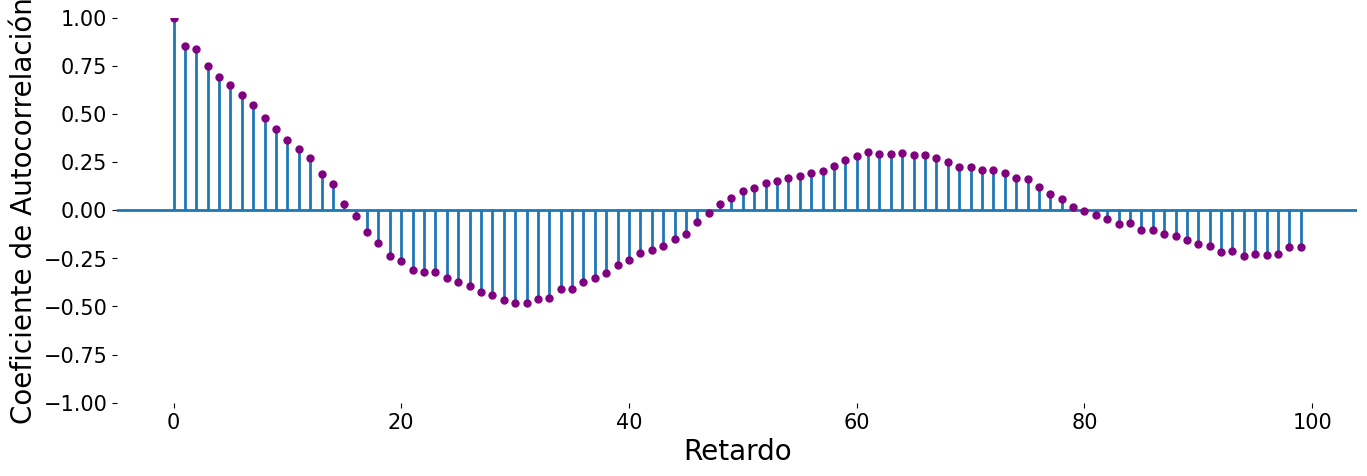

In [13]:
## Función de autocorrelación
## Podría detectarse cierta estacionalidad a través de los años con respecto a la incidencia de homicidios en Veracruz, sin 
## embargo, no es tan evidente algún patrón o tendencia en ello.
plot_acf(datos2, lags = 99, alpha = None)
plt.ylabel('Coeficiente de Autocorrelación')
plt.title('')
plt.xlabel('Retardo')
plt.show()

In [14]:
## Se realizó un modelo ARIMA con las 120 observaciones
## Posteriormente se realizó empleando datos de entrenamiento para hacer el modelo y datos de prueba para las predicciones,
## obteniendose resultados similares
m = auto_arima(datos['Cantidad'], seasonal = True, m = 12, trace = True)
m
m.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1079.051, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1104.377, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1071.855, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1074.538, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1102.544, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1074.750, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1073.855, Time=0.19 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1073.855, Time=0.10 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1072.086, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1075.841, Time=0.37 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1101.350, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.466, Time=0.13 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1073.446, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1074.428, Time=0.07 sec
 ARIMA(2,1,1)(1,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -532.071
Date:                            Tue, 02 Apr 2024   AIC                           1070.143
Time:                                    15:46:33   BIC                           1078.480
Sample:                                         0   HQIC                          1073.528
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4803      0.071     -6.798      0.000      -0.619      -0.342
ar.S.L12       0.2116      0.090      2.364      0.018       0.036       0.387
sigma2       444.8206     49.101      9.059      0.000     348.584     541.057
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                11.31
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.53
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
## Ajustar el modelo usando datos de entrenamiento y de prueba
## Dividir los datos en entrenamiento y prueba
train_data = datos[:len(datos)-12]
test_data = datos[len(datos)-12:]
test = test_data.copy()

modelo_arima = SARIMAX(train_data['Cantidad'], order = (1,1,0), seasonal_order = (1,0,0,12))
resultado_arima = modelo_arima.fit()
resultado_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Cantidad   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -477.762
Date:                            Tue, 02 Apr 2024   AIC                            961.523
Time:                                    15:48:09   BIC                            969.542
Sample:                                         0   HQIC                           964.774
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4566      0.073     -6.245      0.000      -0.600      -0.313
ar.S.L12       0.2618      0.102      2.561      0.010       0.061       0.462
sigma2       437.9564     51.640      8.481      0.000     336.743     539.170
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 9.84
Prob(Q):                              0.81   Prob(JB):                         0.01
Heteroskedasticity (H):               1.36   Skew:                             0.53
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
## El modelo obtenido fue un SARIMAX (1,1,0) (1,0,0,12)
## Predicciones
pred_arima = resultado_arima.predict(start = len(train_data), end = len(datos)-1, typ = 'levels').rename('Predicciones ARIMA')
pred_arima

C:\Users\PROPIETARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


108    197.712770
109    195.798739
110    195.904169
111    193.858714
112    199.999345
113    203.728795
114    221.761090
115    231.983457
116    217.841934
117    226.744790
118    219.937590
119    220.985241
Name: Predicciones ARIMA, dtype: float64

Text(0.5, 1.0, 'Modelo ARIMA')

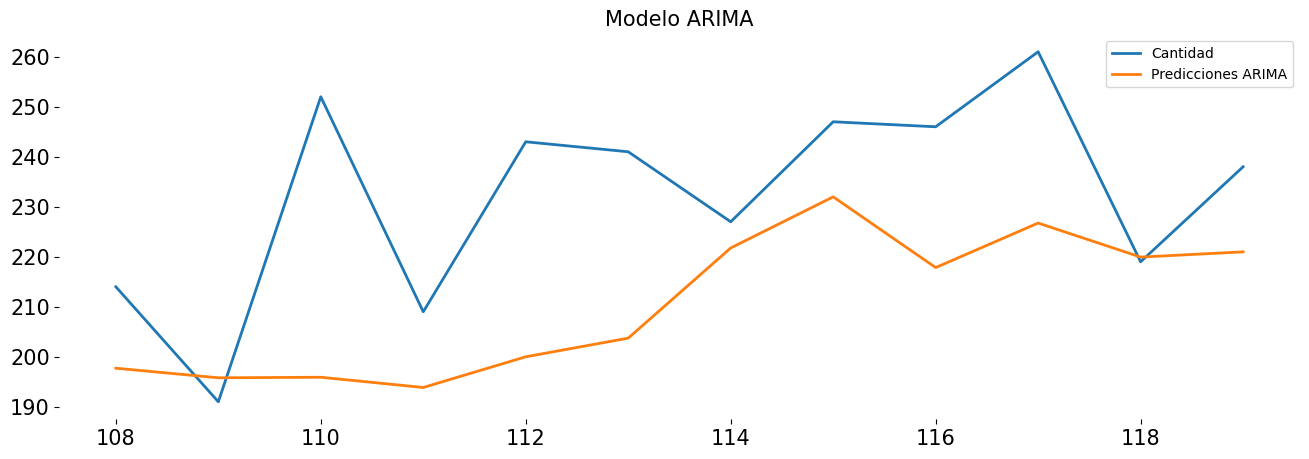

In [18]:
test_data['Cantidad'].plot(figsize = (16,5), legend = True)
pred_arima.plot(legend = True);
plt.title('Modelo ARIMA', fontsize = 15)
## Se comparó la cantidad de homicidios cometidos en el periodo 2008-2017, con la cantidad que según nuestro modelo dijó
## que ocurrieron en ese lapso, lo cual puede observarse en el gráfico.

In [19]:
error_rmse_arima = rmse(test_data['Cantidad'], pred_arima)
error_mse_arima = error_rmse_arima ** 2
mean_value = datos['Cantidad'].mean()

print(f'MSE Error: {error_mse_arima}\nRMSE Error: {error_rmse_arima}\nMedia: {mean_value}')

MSE Error: 784.3434649026636
RMSE Error: 28.00613263024125
Media: 134.675


In [20]:
test_data['Predicciones ARIMA'] = pred_arima
test_data

C:\Users\PROPIETARIO\AppData\Local\Temp\ipykernel_328\1298197445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicciones ARIMA'] = pred_arima


,Fecha,Cantidad,Predicciones ARIMA
108,2017-01-01,214,197.712770
109,2017-02-01,191,195.798739
110,2017-03-01,252,195.904169
111,2017-04-01,209,193.858714
112,2017-05-01,243,199.999345
113,2017-06-01,241,203.728795
114,2017-07-01,227,221.761090
115,2017-08-01,247,231.983457
116,2017-09-01,246,217.841934
117,2017-10-01,261,226.744790


In [22]:
## Generar pronósticos
n_predicciones = 12
pronosticos, intervalo_confianza = m.predict(n_periods = n_predicciones, return_conf_int = True)
print(pronosticos, intervalo_confianza)

120    233.090353
121    232.410650
122    243.307579
123    235.174367
124    241.905095
125    241.704651
126    238.635195
127    242.918676
128    242.682394
129    245.868320
130    236.975220
131    240.998448
dtype: float64 [[191.75320426 274.42750239]
 [185.823773   278.99752756]
 [187.33872135 299.27643734]
 [173.2746339  297.07410062]
 [173.70120541 310.10898409]
 [168.13439608 315.27490659]
 [159.88473576 317.38565464]
 [159.38987795 326.44747425]
 [154.59712172 330.76766648]
 [153.46793641 338.26870299]
 [140.44463751 333.50580338]
 [140.51087592 341.48601982]]


In [24]:
# Crea un DataFrame con las fechas de pronóstico
fechas_prediccion = pd.date_range(start=datos.index[-1], periods=n_predicciones + 1, freq='M')[1:]
predicciones_df = pd.DataFrame({'Fecha': fechas_prediccion, 'Pronóstico': pronosticos})
predicciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 120 to 131
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       12 non-null     datetime64[ns]
 1   Pronóstico  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 324.0 bytes


In [ ]:
## Se obtuvieron los datos reales de la cantidad de homicidios llevados a cabo en el 2018, para hacer una comparación de 
## las predicciones que hace el modelo contra los homicidios que realmente ocurrieron

In [33]:
### Hacer la comparación con los datos reales
## Obteniendo los datos reales del 2018
d = pd.read_excel('IDEFC_NM_feb24.xlsx')

## Seleccionar sólo las observaciones referentes al Edo. de Veracruz
datos = d.query('Entidad == "Veracruz"')
## Seleccionar sólo observaciones de tipo "Homicidio"
datos2 = datos.query('Tipo_de_delito == "Homicidio"')
## Exportar los datos a un archivo de tipo Excel
#datos2.to_excel('Homicidios_2018.xlsx', index = False)
## Obtener la hoja del archivo con los registros de interés
d1 = pd.read_excel('Homicidios_2018.xlsx', sheet_name = 'Registros')
d1.head()

,Fecha,Cantidad
0,2008-01,128
1,2008-02,129
2,2008-03,144
3,2008-04,140
4,2008-05,143


In [34]:
## Tomar los registros reales referentes a los años 2017 y 2018 para hacer la comparación
Reg = d1.iloc[108:133,]
Reg.head()

,Fecha,Cantidad
108,2017-01,214
109,2017-02,191
110,2017-03,252
111,2017-04,209
112,2017-05,243


In [35]:
## Tomar los registros para el año 2017 y 2018, los valores reales para el 2017 y el pronóstico de nuestro modelo para el 2018
d2 = pd.read_excel('Homicidios_2018.xlsx', sheet_name = 'Pronostico')
Pron = d2.iloc[108:133,]
Pron.head()

,Fecha,Cantidad
108,2017-01,214
109,2017-02,191
110,2017-03,252
111,2017-04,209
112,2017-05,243


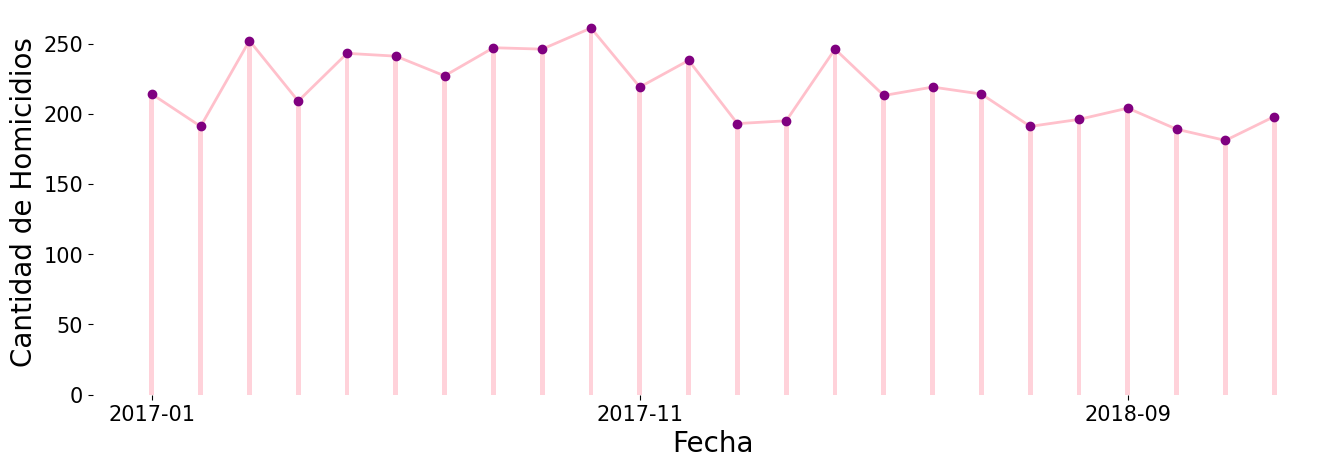

In [36]:
Reg2 = Reg[["Fecha", "Cantidad"]].set_index(["Fecha"])

# Serie de tiempo
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=10))
ax.plot(Reg2.index, Reg2["Cantidad"], 
        color="pink", marker="o", linestyle="-")
ax.bar(Reg2.index, Reg2["Cantidad"], 
       width=0.1, color="pink", alpha=0.7)
ax.set_ylabel("Cantidad de Homicidios")
ax.set_xlabel('Fecha')
plt.show()

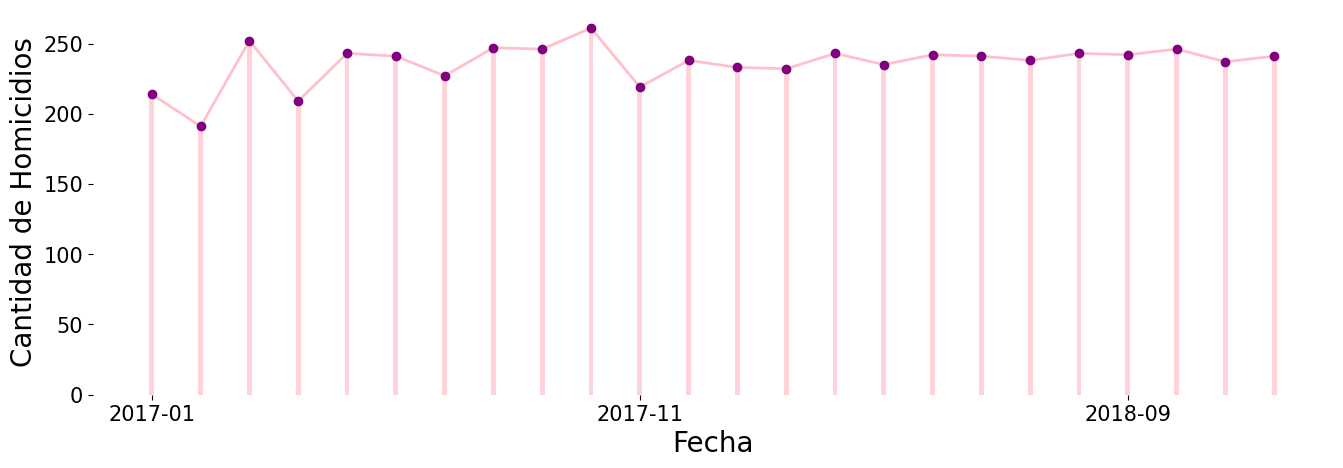

In [37]:
Pron2 = Pron[["Fecha", "Cantidad"]].set_index(["Fecha"])

# Serie de tiempo
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=10))
ax.plot(Pron2.index, Pron2["Cantidad"], 
        color="pink", marker="o", linestyle="-")
ax.bar(Pron2.index, Pron2["Cantidad"], 
       width=0.1, color="pink", alpha=0.7)
ax.set_ylabel("Cantidad de Homicidios")
ax.set_xlabel('Fecha')
plt.show()

In [38]:
Pronostico = Pron['Cantidad']
Pronostico
Reg['Pronosticos'] = Pronostico
Reg.head()

C:\Users\PROPIETARIO\AppData\Local\Temp\ipykernel_328\363112221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reg['Pronosticos'] = Pronostico


,Fecha,Cantidad,Pronosticos
108,2017-01,214,214
109,2017-02,191,191
110,2017-03,252,252
111,2017-04,209,209
112,2017-05,243,243


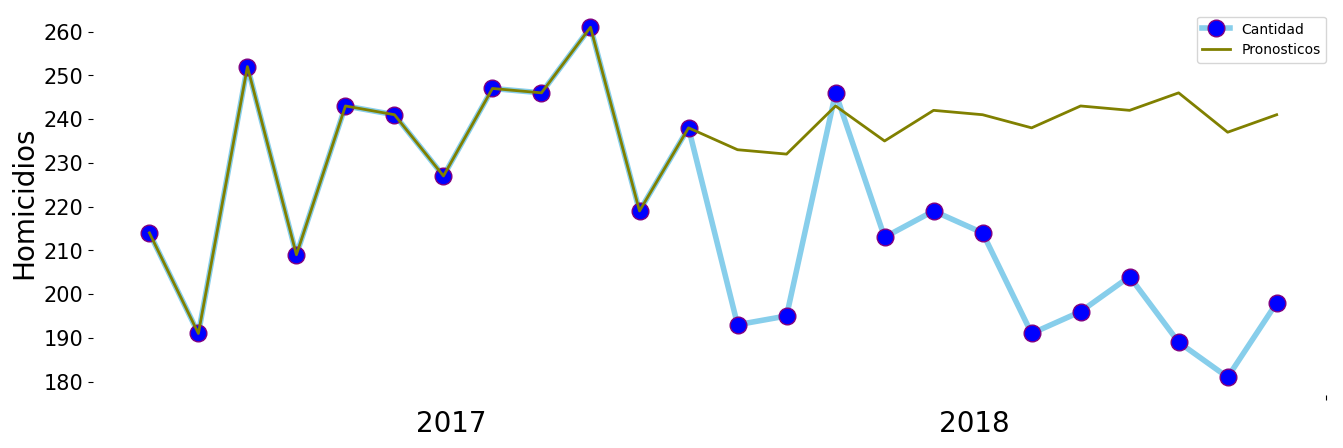

In [39]:
plt.plot( 'Fecha', 'Cantidad', data=Reg, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Fecha', 'Pronosticos', data=Reg, marker='', color='olive', linewidth=2)
plt.xlabel('2017                                                   2018')
plt.ylabel('Homicidios')
marcas = ['']
plt.xticks('Fecha', marcas)

# show legend
plt.legend()

# show graph
plt.show()

In [ ]:
## En el gráfico anterior se puede ver la comparación de la cantidad de homicidios cometidos en el año 2018, con respecto 
## a la cantidad que el modelo pronosticó que ocurrirían

## La línea azul indica los valores reales, mientras la línea verde representa lo pronosticado.

# La cantidad de homicidios disminuyó con respecto a los últimos meses del 2017, el modelo estimó que habrían más homicidios
# en el 2018, con respecto a los que en realidad hubieron. Posiblemente debido a la tendencia que se venía mostrando, no 
# consideró que disminuiría la cantidad real.